## 1.2 Hidden Messages in the Replication Origin

Operating under the assumption that DNA is a language of its own, let's borrow Legrand's method and see if we can find any surprisingly frequent "words" within the ori of Vibrio cholerae. We have added reason to look for frequent words in the ori because for various biological processes, certain nucleotide strings often appear surprisingly often in small regions of the genome. This is often because certain proteins can only bind to DNA if a specific string of nucleotides is present, and if there are more occurrences of the string, then it is more likely that binding will successfully occur. (It is also less likely that a mutation will disrupt the binding process.)

For example, ACTAT is a surprisingly frequent substring of ACAACTATGCATACTATCGGGAACTATCCT.

**We will use the term k-mer to refer to a string of length k and define Count(Text, Pattern) as the number of times that a k-mer Pattern appears as a substring of Text. Following the above example**,

`Count(ACAACTATGCATACTATCGGGAACTATCCT, ACTAT) = 3`.

We note that Count(CGATATATCCATAG, ATA) is equal to 3 (not 2) since we should account for overlapping occurrences of Pattern in Text.

To compute Count(Text, Pattern), our plan is to “slide a window” down Text, checking whether each k-mer substring of Text matches Pattern. We will therefore refer to the k-mer starting at position i of Text as Text(i, k). Throughout this book, we will often use 0-based indexing, meaning that we count starting at 0 instead of 1. In this case, Text begins at position 0 and ends at position |Text| − 1 (|Text| denotes the number of symbols in Text). For example, if Text = GACCATACTG, then Text(4, 3) = ATA. Note that the last k-mer of Text begins at position |Text| − k, e.g., the last 3-mer of GACCATACTG starts at position 10 − 3 = 7. This discussion results in the following pseudocode for computing Count(Text, Pattern).

```
    PatternCount(Text, Pattern)
        count ← 0
        for i ← 0 to |Text| − |Pattern|
            if Text(i, |Pattern|) = Pattern
                count ← count + 1
        return count
```

Code Challenge: Implement PatternCount (reproduced below).
     Input: Strings Text and Pattern.
     Output: Count(Text, Pattern).

```
PatternCount(Text, Pattern)
  count ← 0
  for i ← 0 to |Text| − |Pattern|
    if Text(i, |Pattern|) = Pattern
      count ← count + 1
  return count
````

In [3]:
with open ("data/dataset_2_6.txt") as input_file:
    Text, Pattern = input_file.read().strip().split()

def PatternCount(Text,Pattern):
    count = 0
    for i in range(len(Text) - len(Pattern)):
        if Text[i:i+len(Pattern)] == Pattern:
            count += 1
    return count

total_count = PatternCount(Text,Pattern)

with open('output/dataset_2_6.txt', 'w') as output_data:
    output_data.write(str(total_count))

In [29]:
PatternCount('CGCGATACGTTACATACATGATAGACCGCGCGCGATCATATCGCGATTATC', 'CGCG')

5

In [35]:
def PatternMatching(Text,Pattern):
    position = ""
    for i in range(len(Text) - len(Pattern)+ 1):
        if Text[i:i+len(Pattern)] == Pattern:
            position += str(i) + " "
    return position.strip()

Text = 'ATGACTTCGCTGTTACGCGC'
Pattern = 'CGC'

PatternMatching(Text,Pattern)

'7 15 17'

## The Frequent Words Problem

We say that Pattern is a most frequent k-mer in Text if it maximizes Count(Text, Pattern) among all k-mers. You can see that `ACTAT` is a most frequent 5-mer of `ACAACTATGCATACTATCGGGAACTATCCT`, and `ATA` is a most frequent 3-mer of CGATATATCCATAG.

STOP and Think: Can a string have multiple most frequent k-mers?

We now have a rigorously defined computational problem.

Frequent Words Problem: Find the most frequent k-mers in a string.

Input: A string Text and an integer k.
Output: All most frequent k-mers in Text.

 A straightforward algorithm for finding the most frequent k-mers in a string Text checks all k-mers appearing in this string (there are |Text| − k + 1 such k-mers) and then computes how many times each k-mer appears in Text. To implement this algorithm, called FrequentWords, we will need to generate an array Count, where Count(i) stores Count(Text, Pattern) for Pattern = Text(i, k) (see figure below).

The pseudocode for FrequentWords is shown below.

---
```
FrequentWords(Text, k)
    FrequentPatterns ← an empty set
    for i ← 0 to |Text| − k
        Pattern ← the k-mer Text(i, k)
        Count(i) ← PatternCount(Text, Pattern)
    maxCount ← maximum value in array Count
    for i ← 0 to |Text| − k
        if Count(i) = maxCount
            add Text(i, k) to FrequentPatterns
    remove duplicates from FrequentPatterns
    return FrequentPatterns
```
---

A Faster Frequent Words Approach:
If you were to solve the Frequent Words Problem by hand for a small example, you would probably form a table like the one in the figure below for Text equal to "ACGTTTCACGTTTTACGG" and k equal to 3. You would slide a length-k window Text, and if the current k-mer substring of text does not occur in the table, then you would create a new entry for it. Otherwise, you would add 1 to the entry corresponding to the current k-mer substring of Text. We call this table the frequency table for Text and k.

---
```
FrequencyTable(Text, k)
    freqMap ← empty map
    n ← |Text|
    for i ← 0 to n − k
        Pattern ← Text(i, k)
        if freqMap[Pattern] doesn't exist
            freqMap[Pattern]← 1
        else
           freqMap[pattern] ←freqMap[pattern]+1 
    return freqMap
```
---


In [4]:
def FrequencyTable(Text,k):
    freqMap = {}
    n = len(Text)
    for i in range(n-k):
        Pattern = Text[i:i+k]
        if Pattern not in freqMap:
            freqMap[Pattern] = 1
        else:
            freqMap[Pattern] += 1
    return freqMap

FrequencyTable('ACGTTGCATGTCGCATGATGCATGAGAGCT',4)

{'ACGT': 1,
 'CGTT': 1,
 'GTTG': 1,
 'TTGC': 1,
 'TGCA': 2,
 'GCAT': 3,
 'CATG': 3,
 'ATGT': 1,
 'TGTC': 1,
 'GTCG': 1,
 'TCGC': 1,
 'CGCA': 1,
 'ATGA': 2,
 'TGAT': 1,
 'GATG': 1,
 'ATGC': 1,
 'TGAG': 1,
 'GAGA': 1,
 'AGAG': 1,
 'GAGC': 1}

Once we have built the frequency table for a given Text and k, we can find all frequent k-mers if we determine the maximum value in the table, and then identify the keys of the frequency table achieving this value, appending each one that we find to a growing list. We are now ready to write a function BetterFrequentWords to solve the Frequent Words Problem.  This function relies on a function MaxMap that takes a map of strings to integers as an input and returns the maximum value of this map as output. 

---
```
BetterFrequentWords(Text, k)
    FrequentPatterns ← an array of strings of length 0
    freqMap ← FrequencyTable(Text, k)
    max ← MaxMap(freqMap)
    for all strings Pattern in freqMap
        if freqMap[pattern] = max
            append Pattern to frequentPatterns
    return frequentPatterns
```
---

In [31]:
with open ("data/dataset_2_13.txt") as input_file:
    Text, k = input_file.read().strip().split()

def BetterFrequentWords(Text,k):
    k = int(k)
    FrequentPatterns = ""
    freqMap = FrequencyTable(Text, k)
    maxMap = max(freqMap.values())
    for Pattern in freqMap:
        if freqMap[Pattern] == maxMap:
            FrequentPatterns += Pattern + " "
    return FrequentPatterns.strip()

FrequentPatterns = BetterFrequentWords(Text,k)
print(FrequentPatterns)
with open('output/dataset_2_13.txt', 'w') as output_data:
    output_data.write((FrequentPatterns))

TGAATCTGTGAAT GAATCTGTGAATC AATCTGTGAATCT ATCTGTGAATCTG


In [32]:
Text = 'TAAACGTGAGAGAAACGTGCTGATTACACTTGTTCGTGTGGTAT'
k = 3
BetterFrequentWords(Text,k)

'GTG'

In [34]:
from Bio.Seq import Seq
dna = Seq('GATTACA')
print(dna.reverse_complement())

TGTAATC


In [18]:
with open ("data/Vibrio_cholerae.txt") as input_file:
    Text = input_file.read().strip()
    k = 9
#print(Text)

FrequentPatterns = BetterFrequentWords(Text,k)
print(FrequentPatterns)
with open('output/Vibrio_cholerae.txt', 'w') as output_data:
    output_data.write((FrequentPatterns))

GCGTTTGTT 


## 1.3 Peculiar Statistics of the Forward and Reverse Half-Strands

Since we don't know the location of ori in a circular genome, let's linearize it (i.e., select an arbitrary position and pretend that the genome begins here), resulting in a linear string Genome. We define Skewi(Genome) as the difference between the total number of occurrences of G and the total number of occurrences of C in the first i nucleotides of Genome. The skew diagram is defined by plotting Skewi (Genome) (as i ranges from 0 to |Genome|), where Skew0 (Genome) is set equal to zero. The figure below shows a skew diagram for the DNA string CATGGGCATCGGCCATACGCC.

Note that we can compute Skewi+1(Genome) from Skewi(Genome) according to the nucleotide in position i of Genome. If this nucleotide is G, then Skewi+1(Genome) = Skewi(Genome) + 1; if this nucleotide is C, then Skewi+1(Genome)= Skewi(Genome) – 1; otherwise, Skewi+1(Genome) = Skewi(Genome).

In [23]:
def gc_skew(dna):
    skew= 0
    sequence = [0]
    bases =   {'G' :  1, 
               'C' : -1,
               'A' :  0,
               'T' :  0}
    for nt in dna:
        skew  += bases[nt]
        sequence.append(skew)
    print(len(sequence))
    return sequence


61


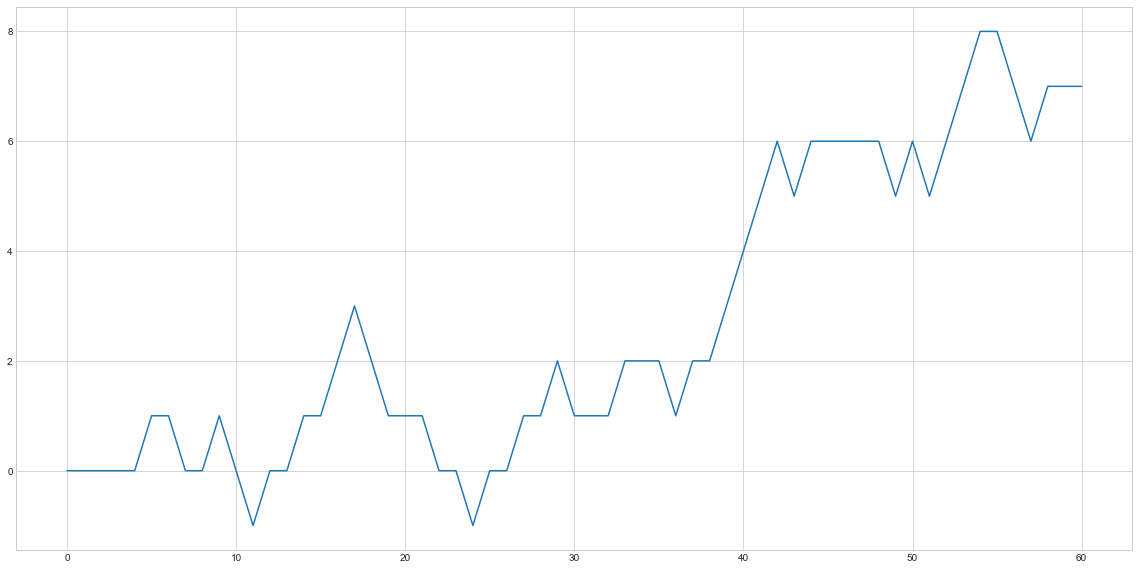

In [27]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

data = gc_skew('TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT')
x = range(0,len(data))

plt.figure(figsize=(20,10))
plt.plot(x, data)
plt.show()


In [9]:
with open ("data/dataset_7_10.txt") as input_file:
    Text = input_file.read().strip()

def minimum_gc_skew(dna):
    skew= 0
    sequence = [0]
    bases =   {'G' :  1, 
               'C' : -1,
               'A' :  0,
               'T' :  0}
    for nt in dna:
        skew  += bases[nt]
        sequence.append(skew)
    mn = min(sequence)
    return [str(index) for index, value in enumerate(sequence) if value == mn]

min_skew = minimum_gc_skew(Text)
print(min_skew)

with open('output/dataset_7_10.txt', 'w') as output_data:
    output_data.write(' '.join(min_skew))

['81363', '81364', '81371', '81372', '81373', '81374']


In [71]:
minimum_gc_skew('TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT')

[11, 24]

## 1.4 Some Hidden Messages are More Elusive than Others

We say that position i in k-mers p1 … pk and q1 … qk is a mismatch if pi ≠ qi. For example, CGAAT and CGGAC have two mismatches. The number of mismatches between strings p and q is called the Hamming distance between these strings and is denoted HammingDistance(p, q).

Hamming Distance Problem: Compute the Hamming distance between two strings.

Input: Two strings of equal length.
Output: The Hamming distance between these strings.
Code Challenge: Solve the Hamming Distance Problem.

In [5]:
with open('data/dataset_9_3.txt') as input_data:
	s, t = [line.rstrip('\n') for line in input_data.readlines()]

def HammingDistance(first_seq,second_seq):
    'Return the Hamming distance between equal-length sequences.'
    if len(first_seq) != len(second_seq):
        return -1
    return sum(first_nt != seccond_nt for first_nt,seccond_nt in zip(first_seq,second_seq)) 

count = HammingDistance(s,t)

print(count)
with open('output/dataset_9_3.txt', 'w') as output_data:
	output_data.write(str(count))

784


In [41]:
with open ("data/dataset_9_4.txt") as input_file:
    Pattern,Text, d = input_file.read().strip().split()
d = int(d)

#print(Text,pattern, k)
def ApproximatePatternMatching(Text,Pattern,d):
    k , n = len(Pattern), len(Text)
    position = []

    for i in range(n - k + 1):
        if HammingDistance(Pattern,Text[i:i+k]) <= d:
            position.append(str(i))
    return ' '.join(position)

print(ApproximatePatternMatching(Text,Pattern,d))

with open('output/dataset_9_4.txt', 'w') as output_data:
    output_data.write(' '.join(min_skew))

14 16 113 146 164 172 197 241 363 370 377 400 416 417 434 437 440 456 467 473 527 556 590 591 639 663 665 675 695 722 739 749 759 761 773 785 822 834 850 853 855 857 859 871 889 891 907 944 946 949 954 976 992 1017 1020 1038 1040 1050 1052 1054 1057 1078 1090 1091 1104 1108 1120 1122 1125 1139 1146 1149 1161 1163 1181 1186 1194 1196 1198 1200 1216 1241 1247 1275 1320 1361 1366 1372 1394 1407 1409 1411 1430 1434 1439 1441 1453 1514 1516 1562 1575 1588 1606 1646 1673 1695 1705 1717 1731 1766 1823 1883 1900 1912 1922 1935 1980 1987 1999 2009 2010 2012 2023 2062 2072 2092 2097 2104 2107 2139 2194 2211 2261 2268 2270 2290 2305 2308 2320 2321 2323 2373 2430 2459 2482 2508 2524 2561 2580 2621 2660 2679 2681 2730 2737 2753 2793 2817 2829 2859 2882 2897 2924 2945 2981 2991 2998 3020 3022 3037 3054 3058 3090 3095 3105 3108 3109 3111 3135 3154 3181 3184 3195 3197 3210 3221 3223 3260 3261 3262 3270 3289 3321 3344 3406 3408 3423 3426 3428 3429 3440 3454 3457 3495 3498 3505 3530 3544 3546 3575 3655 

## 1.4 Some Hidden Messages are More Elusive than Others

Computing Countd(Text, Pattern) simply requires us to compute the Hamming distance between Pattern and every k-mer substring of Text, which is achieved by the following pseudocode.

---
```
ApproximatePatternCount(Text, Pattern, d)
        count ← 0
        for i ← 0 to |Text| − |Pattern|
            Pattern′ ← Text(i , |Pattern|)
           if HammingDistance(Pattern, Pattern′) ≤ d
                count ← count + 1
        return count
```
---

In [48]:
with open ("data/dataset_9_6.txt") as input_file:
    Pattern,Text, d = input_file.read().strip().split()
d = int(d)

def ApproximatePatternCount(Text,Pattern,d=2):
    k , n = len(Pattern), len(Text)
    count = 0
    for i in range(n - k + 1):
        if HammingDistance(Pattern,Text[i:i+k]) <= d:
            count += 1
    return count

count = ApproximatePatternCount(Text, Pattern,d)
print(count)

with open('output/dataset_9_6.txt', 'w') as output_data:
	output_data.write(str(count))

3


## 1.4 Some Hidden Messages are More Elusive than Others

The Clump Finding Problem is a more complex problem than we have encountered thus far, and writing a function solving it from scratch would be difficult. However, this is where modularity in writing programs is so helpful. We already have a FrequencyTable function that will produce a frequency table for a given window of a string of length L. If we apply it to a given window, then we simply need to check if there are any string keys in the table whose values are at least equal to t. We will append any such keys that we have not already seen in some other window of text to a growing list of strings. In the end, this list of strings will contain the (L, t)-clumps of text. This is handled by the following FindClumps function.

We defined a k-mer as a "clump" if it appears many times within a short interval of the genome. More formally, given integers L and t, a k-mer Pattern forms an (L, t)-clump inside a (longer) string Genome if there is an interval of Genome of length L in which this k-mer appears at least t times. (This definition assumes that the k-mer completely fits within the interval. This also does not take reverse complements into account yet.) For example, TGCA forms a (25,3)-clump in the following Genome:

---
```
FindClumps(Text, k, L, t)
    Patterns ← an array of strings of length 0
    n ← |Text|
    for every integer i between 0 and n − L
        Window ← Text(i, L)
        freqMap ← FrequencyTable(Window, k)
        for every key s in freqMap
            if freqMap[s] ≥ t
                append s to Patterns
    remove duplicates from Patterns
    return Patterns
```
---

Code Challenge: Solve the Clump Finding Problem (restated below). You will need to make sure that your algorithm is efficient enough to handle a large dataset.

### Clump Finding Problem: Find patterns forming clumps in a string.

- Input: A string Genome, and integers k, L, and t.
- Output: All distinct k-mers forming (L, t)-clumps in Genome.

Sample Input:
```
CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA
5 50 4
```
Sample Output:

`CGACA GAAGA`

In [8]:
def FindClumps(Text, k, L,t):
    k, L, t = int(k), int(L) , int(t)
    Pattern = []
    n = len(Text)
    for i in range(n - L):
        Window = Text[i:i + L]
        freqMap = FrequencyTable(Window, k)
        for key,value in freqMap.items():
            if freqMap[key] >= t:
                Pattern.append(key)
    return " ".join(set(Pattern))

Text = "CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA"
k = 5
L = 50
t = 4
FindClumps(Text, k, L, t)

'CGACA GAAGA'

In [25]:
with open ("data/dataset_4_5.txt") as input_file:
    Text, k, L, t = input_file.read().strip().split()

def FindClumps(Text, k, L,t):
    k, L, t = int(k), int(L) , int(t)
    Pattern = []
    n = len(Text)
    for i in range(n - L):
        Window = Text[i:i + L]
        freqMap = FrequencyTable(Window, k)
        for key,value in freqMap.items():
            if freqMap[key] >= t:
                Pattern.append(key)
    return " ".join(set(Pattern))

Clumps = FindClumps(Text, k, L, t)
print(Clumps)

with open('output/dataset_4_5.txt', 'w') as output_data:
    output_data.write(Clumps)

In [ ]:
with open ("data/dataset_7_10.txt") as input_file:
    Text = input_file.read().strip()

def minimum_gc_skew(dna):
    skew= 0
    sequence = [0]
    bases =   {'G' :  1, 
               'C' : -1,
               'A' :  0,
               'T' :  0}
    for nt in dna:
        skew  += bases[nt]
        sequence.append(skew)
    mn = min(sequence)
    return [str(index) for index, value in enumerate(sequence) if value == mn]

min_skew = minimum_gc_skew(Text)
print(min_skew)

with open('output/dataset_7_10.txt', 'w') as output_data:
    output_data.write(' '.join(min_skew))

In [16]:
for salmonella_enterica in SeqIO.parse("data/Salmonella_enterica.txt", "fasta"):
    Text = salmonella_enterica.seq

min_skew = minimum_gc_skew(Text)
print(min_skew)

['3764856', '3764858']


4809038


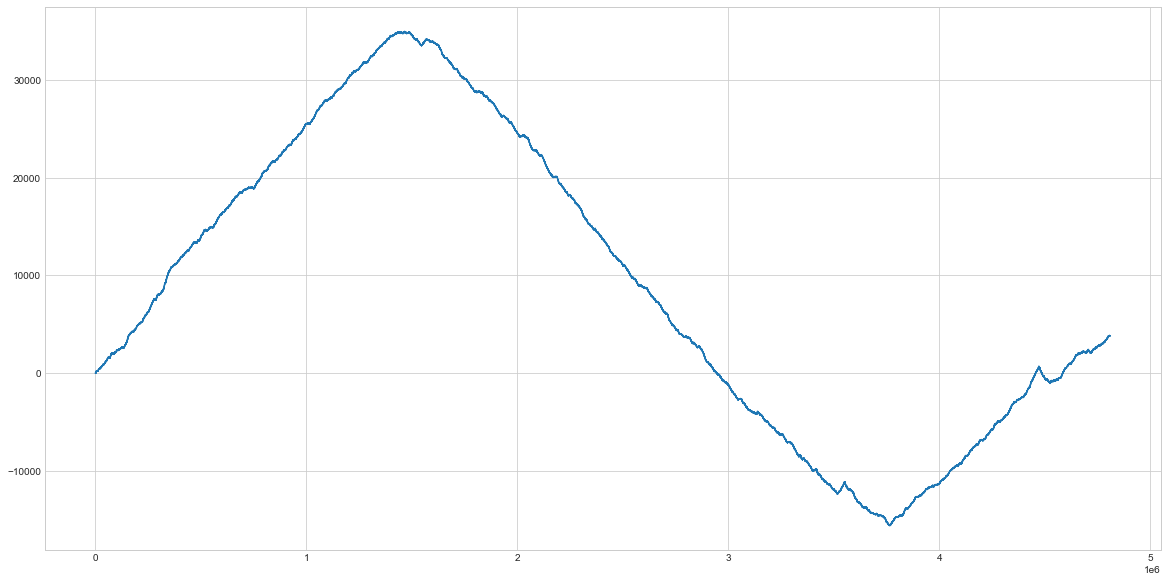

In [29]:
# Salmonella Enterica GC skew polt
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

data = gc_skew(Text)
x = range(0,len(data))

plt.figure(figsize=(20,10))
plt.plot(x, data)
plt.show()


## 1.7 CS: Generating the Neighborhood of a String

Our goal is to generate the d-neighborhood Neighbors(Pattern, d), the set of all k-mers whose Hamming distance from Pattern does not exceed d. As a warm up, we will first generate the 1-neigborhood of Pattern using the following pseudocode.

---
```
 ImmediateNeighbors(Pattern)
        Neighborhood ← the set consisting of single string Pattern
        for i = 1 to |Pattern|
            symbol ← i-th nucleotide of Pattern
            for each nucleotide x different from symbol
                Neighbor ← Pattern with the i-th nucleotide substituted by x
                add Neighbor to Neighborhood
        return Neighborhood
```
---

Now, consider a (k − 1)-mer Pattern’ belonging to Neighbors(Suffix(Pattern), d). By the definition of the d-neighborhood Neighbors(Suffix(Pattern), d), we know that HammingDistance(Pattern′, Suffix(Pattern)) is either equal to d or less than d. In the first case, we can add FirstSymbol(Pattern) to the beginning of Pattern’ in order to obtain a k-mer belonging to Neighbors(Pattern, d). In the second case, we can add any symbol to the beginning of Pattern’ and obtain a k-mer belonging to Neighbors(Pattern, d).

For example, to generate Neighbors(CAA,1), first form Neighbors(AA,1) = {AA, CA, GA, TA, AC, AG, AT}. The Hamming distance between AA and each of six of these neighbors is 1. Firstly, concatenating C with each of these patterns results in six patterns (CAA, CCA, CGA, CTA, CAC, CAG, CAT) that belong to Neighbors(CAA, 1). Secondly, concatenating any nucleotide with AA results in four patterns (AAA, CAA, GAA, and TAA) that belong to Neighbors(CAA, 1). Thus, Neighbors(CAA, 1) comprises ten patterns.

In [31]:
def ImmediateNeighbors(pattern):
    neighborhood = set()
    for i in range(len(pattern)):
        symbol = pattern[i]
        for x in "ACTG":
            if x != symbol:
                neighbor = pattern[:i] + x + pattern[i+1:]
                neighborhood.add(neighbor)
    return neighborhood

In [43]:
print(ImmediateNeighbors('ATGC'))

{'ATTC', 'CTGC', 'ATGA', 'AAGC', 'AGGC', 'ATGG', 'ACGC', 'ATGT', 'ATCC', 'GTGC', 'TTGC', 'ATAC'}


## 1.7 CS: Generating the Neighborhood of a String

In the following pseudocode, we use the notation symbol `*` Text to denote the concatenation of a character symbol and a string Text, e.g., A `*` GCATG = AGCATG.

---
```
  Neighbors(Pattern, d)
        if d = 0
            return {Pattern}
        if |Pattern| = 1 
            return {A, C, G, T}
        Neighborhood ← an empty set
        SuffixNeighbors ← Neighbors(Suffix(Pattern), d)
        for each string Text from SuffixNeighbors
            if HammingDistance(Suffix(Pattern), Text) < d
                for each nucleotide x
                    add x • Text to Neighborhood
            else
                add FirstSymbol(Pattern) • Text to Neighborhood
        return Neighborhood
```
---

In [6]:
with open("data/dataset_3014_4.txt", "r") as f:
        Text = f.readline().strip()
        d = int(f.readline().strip())

def Neighbors(Pattern, d):
    if d == 0:
        return Pattern
    if len(Pattern)==1:
        return {"A", "C", "G", "T"}
    Neighborhood = []
    SuffixNeighbors = Neighbors(Pattern[1:], d)
    for Text in SuffixNeighbors:
        if HammingDistance(Pattern[1:], Text) < d:
            for x in {"A", "C", "G", "T"}:
                Neighborhood.append(x + Text)
        else:
            Neighborhood.append(Pattern[0] + Text)
    return Neighborhood

out = Neighbors(Text, d)
with open('output/dataset_3014_4.txt', 'w') as output_data:
    output_data.write("\n".join(out))

In [3]:
def neighbors(pattern, d,chars = "ACGT"):
    assert(d <= len(pattern))

    if d == 0:
        return [pattern]

    r2 = neighbors(pattern[1:], d-1)
    r = [c + r3 for r3 in r2 for c in chars if c != pattern[0]]

    if (d < len(pattern)):
        r2 = neighbors(pattern[1:], d)
        r += [pattern[0] + r3 for r3 in r2]

    return r


out = neighbors("ACT", 1)
print(out)

with open('output/neihbors.txt', 'w') as output_data:
    output_data.write("\n".join(out))

['CCT', 'GCT', 'TCT', 'AAT', 'AGT', 'ATT', 'ACA', 'ACC', 'ACG']
